In [79]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [57]:
df = pd.read_csv("Financial_inclusion_dataset.csv")
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [11]:
df.columns = ["pays",
    "année",
    "identifiant_unique",
    "compte_bancaire",
    "type_localisation",
    "accès_téléphone",
    "taille_foyer",
    "âge",
    "sexe",
    "relation_chef_famille",
    "statut_matrimonial",
    "niveau_éducation",
    "type_emploi"
]
df

,pays,année,identifiant_unique,compte_bancaire,type_localisation,accès_téléphone,taille_foyer,âge,sexe,relation_chef_famille,statut_matrimonial,niveau_éducation,type_emploi
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [13]:
print(df.columns.tolist())

['pays', 'année', 'identifiant_unique', 'compte_bancaire', 'type_localisation', 'accès_téléphone', 'taille_foyer', 'âge', 'sexe', 'relation_chef_famille', 'statut_matrimonial', 'niveau_éducation', 'type_emploi']


In [15]:
df

,pays,année,identifiant_unique,compte_bancaire,type_localisation,accès_téléphone,taille_foyer,âge,sexe,relation_chef_famille,statut_matrimonial,niveau_éducation,type_emploi
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [17]:
df=df.drop(columns=["identifiant_unique", "année", "pays", "relation_chef_famille"])

In [19]:
df

,compte_bancaire,type_localisation,accès_téléphone,taille_foyer,âge,sexe,statut_matrimonial,niveau_éducation,type_emploi
0,Yes,Rural,Yes,3,24,Female,Married/Living together,Secondary education,Self employed
1,No,Rural,No,5,70,Female,Widowed,No formal education,Government Dependent
2,Yes,Urban,Yes,5,26,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,No,Rural,Yes,5,34,Female,Married/Living together,Primary education,Formally employed Private
4,No,Urban,No,8,26,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...
23519,No,Rural,Yes,4,48,Female,Divorced/Seperated,No formal education,Other Income
23520,No,Rural,Yes,2,27,Female,Single/Never Married,Secondary education,Other Income
23521,No,Rural,Yes,5,27,Female,Widowed,Primary education,Other Income
23522,No,Urban,Yes,7,30,Female,Divorced/Seperated,Secondary education,Self employed


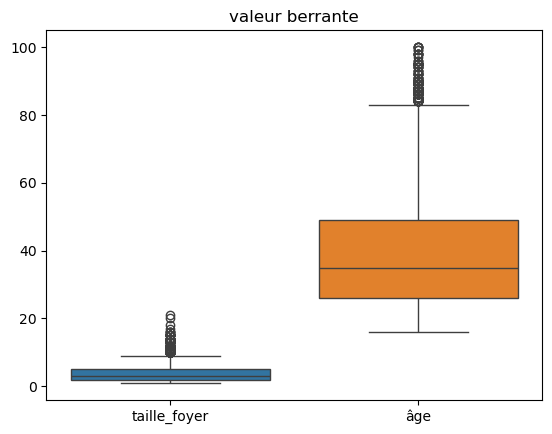

In [21]:
sns.boxplot(df)
plt.title('valeur berrante')
plt.show()

In [23]:
df.describe()

,taille_foyer,âge
count,23524.000000,23524.000000
mean,3.797483,38.805220
std,2.227613,16.520569
min,1.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [27]:
label_encoders = {}

# Encodage sauf 'identifiant_unique' et 'type_emploi'
for col in df.select_dtypes(include=['object']):
    if col not in ['type_emploi']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [29]:
# X = df.drop(['type_emploi'], axis=1)
X=df.drop(columns=['type_emploi'])
Y = df['type_emploi']

In [31]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y , test_size=0.2)

In [61]:
# Model = DecisionTreeClassifier(criterion="gini",splitter="random",max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)
# Model.fit(X_train, Y_train)
Model=RandomForestClassifier(n_estimators=10)
Model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10)

In [63]:
Y_pred = Model.predict(X_test)
Y_pred

array(['Informally employed', 'Farming and Fishing',
       'Remittance Dependent', ..., 'Self employed',
       'Farming and Fishing', 'Remittance Dependent'], dtype=object)

In [65]:
classification_report(Y_test, Y_pred)

'                              precision    recall  f1-score   support\n\n  Dont Know/Refuse to answer       0.00      0.00      0.00        24\n         Farming and Fishing       0.46      0.51      0.48      1106\nFormally employed Government       0.24      0.22      0.23        87\n   Formally employed Private       0.24      0.22      0.23       209\n        Government Dependent       0.07      0.06      0.07        51\n         Informally employed       0.31      0.30      0.31      1108\n                   No Income       0.18      0.14      0.16       130\n                Other Income       0.10      0.08      0.09       201\n        Remittance Dependent       0.28      0.29      0.29       479\n               Self employed       0.47      0.47      0.47      1310\n\n                    accuracy                           0.37      4705\n                   macro avg       0.24      0.23      0.23      4705\n                weighted avg       0.37      0.37      0.37      4705\n'

In [53]:
Y_pred = Model.predict(X_test)
print("Rapport de classification :")
print(classification_report(Y_test, Y_pred))

Rapport de classification :
                              precision    recall  f1-score   support

  Dont Know/Refuse to answer       0.00      0.00      0.00        24
         Farming and Fishing       0.44      0.58      0.50      1106
Formally employed Government       0.00      0.00      0.00        87
   Formally employed Private       0.00      0.00      0.00       209
        Government Dependent       0.00      0.00      0.00        51
         Informally employed       0.34      0.33      0.33      1108
                   No Income       0.00      0.00      0.00       130
                Other Income       0.00      0.00      0.00       201
        Remittance Dependent       0.39      0.26      0.31       479
               Self employed       0.45      0.65      0.53      1310

                    accuracy                           0.42      4705
                   macro avg       0.16      0.18      0.17      4705
                weighted avg       0.35      0.42      0.38 

C:\Users\Mansour\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mansour\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mansour\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [91]:
joblib.dump(Model, 'modele.pkl')

['modele.pkl']

<Axes: xlabel='Predicted', ylabel='Actual'>

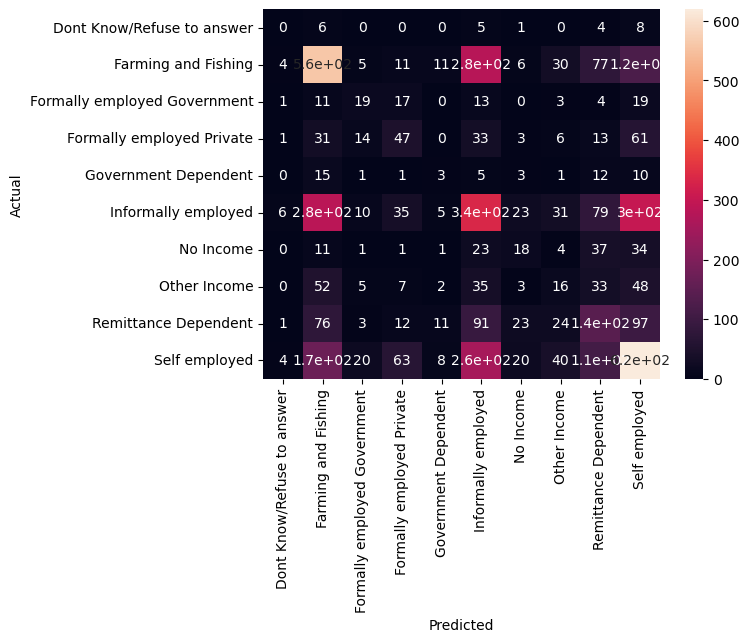

In [89]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)